# 线性回归

在中学我们学过最简单的一元一次方程，这表示的是一条直线。

$$y = ax + b $$

线性回归（linear regression），就是用线性函数去拟合数据。


## 一元线性回归
一元线性回归（Simple Linear Regression）：一元线性回归是指只有一个输入特征的线性回归模型。该模型的形式可以表示为：

$$y = w_0 + w_1x$$

其中 $y$ 是目标变量，$x$ 是单个输入特征，$w_0$ 和 $w_1$ 是模型的权重（也称为系数）。

一元线性回归通过拟合一个直线来描述输入特征和目标变量之间的线性关系。它可以用于预测目标变量在给定输入特征值时的取值。

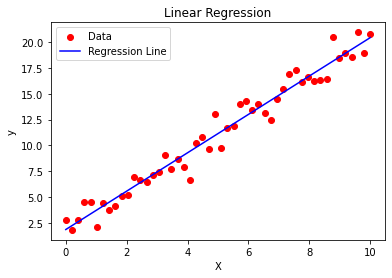

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据用于拟合
np.random.seed(0)
n_samples = 50
X = np.linspace(0, 10, n_samples)
y = 2*X + 1 + np.random.randn(n_samples)  # 使用真实的斜率和截距以及随机噪声

# 计算回归直线的斜率和截距
slope, intercept = np.polyfit(X, y, 1)

# 绘制数据点和回归直线
plt.scatter(X, y, c='r', marker='o', label='Data')  # 绘制数据点
plt.plot(X, slope*X + intercept, 'b-', label='Regression Line')  # 绘制回归直线

# 设置坐标轴标签和图例
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.title('Linear Regression')
plt.show()

## 多元线性回归
多元线性回归（Multiple Linear Regression）：多元线性回归是指具有多个输入特征的线性回归模型。该模型的形式可以表示为：
$y = w_0 + w_1x_1 + w_2x_2 + … + w_nx_n$

其中，$y$ 是目标变量，$x_1, x_2, …, x_n$ 是多个输入特征，$w_0, w_1, w_2, …, w_n$ 是模型的权重。

多元线性回归通过拟合一个超平面来描述多个输入特征和目标变量之间的线性关系。它可以用于预测目标变量在给定多个输入特征值时的取值，并且能够同时考虑多个特征对目标变量的影响。

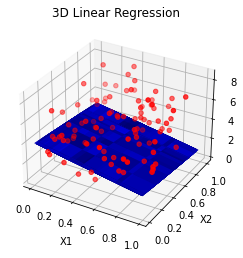

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成随机数据用于拟合
np.random.seed(0)
n_samples = 100
X1 = np.random.rand(n_samples)
X2 = np.random.rand(n_samples)
X3 = np.random.rand(n_samples)
y = 2*X1 + 3*X2 + 4*X3 + np.random.randn(n_samples)  # 使用真实的权重和随机噪声

# 创建网格矩阵以便在3D图中绘制平面
xx, yy = np.meshgrid(X1, X2)
Z = 2*xx + 3*yy + 4*(1-xx-yy)

# 绘制3D散点图和拟合平面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, c='r', marker='o')  # 绘制散点图
ax.plot_surface(xx, yy, Z, color='b', alpha=0.5)  # 绘制平面

# 设置坐标轴标签
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

plt.title('3D Linear Regression')
plt.show()

## 多项式回归
多项式回归（Polynomial Regression）是一种基于线性回归的扩展方法，用于处理非线性关系。它通过添加高阶项到线性模型中来捕捉数据中的非线性趋势。

在多项式回归中，输入特征的幂被引入作为额外的特征，从而允许模型拟合更复杂的曲线。例如，对于一个一元多项式回归，模型可以表示为：

$$y = w_0 + w_1x + w_2x^2 + … + w_nx^n$$

其中 $x$ 是输入特征， $w_0, w_1, w_2, …, w_n$ 是模型的权重（系数），$n$ 是多项式的阶数。

使用scikit-learn库进行多项式回归建模时，可以通过将输入特征进行多项式转换来实现。以下是一个简单的示例：

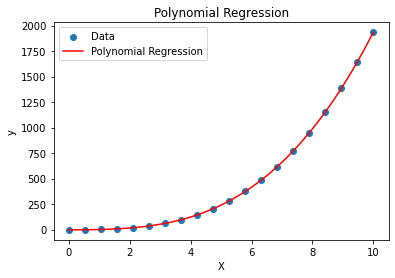

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 生成随机数据用于拟合
np.random.seed(0)
n_samples = 20
X = np.linspace(0, 10, n_samples)
y = 2*X**3 - X**2 + 4*X - 5 + np.random.randn(n_samples)  # 使用真实的系数和随机噪声

# 将输入特征进行多项式转换
poly_transform = PolynomialFeatures(degree=3)
X_poly = poly_transform.fit_transform(X.reshape(-1, 1))

# 创建线性回归模型并拟合数据
model = LinearRegression()
model.fit(X_poly, y)

# 预测新样本
X_new = np.linspace(0, 10, 100)
X_new_poly = poly_transform.transform(X_new.reshape(-1, 1))
y_pred = model.predict(X_new_poly)

# 绘制原始数据和拟合曲线
plt.scatter(X, y, label='Data')
plt.plot(X_new, y_pred, color='r', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression')
plt.show()

## 经典线性回归模型
经典线性回归模型中，假设因变量 $y$ 与自变量 $x_1,..., x_p$ 之间的关系可以表示为：

$$y(w, x) = w_0 + w_1 x_1 + ... + w_p x_p + ε$$

其中，y 是因变量，$x_1,..., x_p$ 是自变量，$w = (w_1,..., w_p)$ 是模型的参数，$ε$ 是误差项（假设服从正态分布）。模型的目标是找到最优的参数估计，通常使用最小二乘法（Ordinary Least Squares，OLS）来求解参数。使得观测值与预测值之间的残差平方和（L2范数）最小化。其数学表达式为:

$$\underset{w}{min} {|| X w^T - y||_2}^2$$




下面是一个糖尿病数据集中某列数据的线性回归示例。

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]] [151.  75. 141. 206. 135.]
系数: 
 [938.23786125]
均方误差: 2548.07
确定系数: 0.47


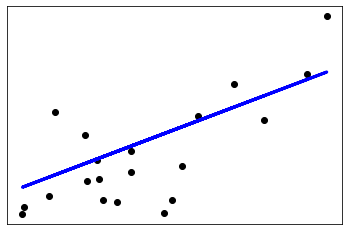

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# 加载糖尿病数据集
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# 只使用一个特征
# 从 diabetes_X 中选择所有行，并且将第三列的元素作为一个新的维度添加进去。 (n_samples, n_features) -> (n_samples, 1)。
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(diabetes_X[:5], diabetes_y[:5])

# X划分测试集和训练集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# y划分测试集和训练集
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# 创建线性回归对象
regr = linear_model.LinearRegression()

# 使用测试集训练模型
regr.fit(diabetes_X_train, diabetes_y_train)

# 使用测试集预测
diabetes_y_pred = regr.predict(diabetes_X_test)

# 系数
print("系数: \n", regr.coef_)
# 均方误差
print("均方误差: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# 确定系数，用R²表示
print("确定系数: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# 可视化输出
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

这个例子涉及到了很多概念。下面将逐步解答。

* [最小二乘法](https://tianxuzhang.github.io/introduction-to-machine-learning/docs/最小二乘法.html)
* [距离和范数](https://tianxuzhang.github.io/introduction-to-machine-learning/docs/距离和范数.html)
* [线性回归的评估](https://tianxuzhang.github.io/introduction-to-machine-learning/docs/线性回归的评估.html)